<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng" data-toc-modified-id="Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nhập thư viện và định nghĩa hàm hữu dụng</a></span></li><li><span><a href="#Tải-dữ-liệu" data-toc-modified-id="Tải-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tải dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tiền xử lý</a></span></li><li><span><a href="#Bước-1:-Tạo-các-mô-hình-univariate" data-toc-modified-id="Bước-1:-Tạo-các-mô-hình-univariate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bước 1: Tạo các mô hình univariate</a></span></li><li><span><a href="#Bước-2:-Chọn-feature-tốt-nhất" data-toc-modified-id="Bước-2:-Chọn-feature-tốt-nhất-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bước 2: Chọn feature tốt nhất</a></span></li><li><span><a href="#Bước-3:-Thêm-lần-lượt-các-feature" data-toc-modified-id="Bước-3:-Thêm-lần-lượt-các-feature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bước 3: Thêm lần lượt các feature</a></span></li><li><span><a href="#Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)" data-toc-modified-id="Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bước 4: Xóa các feature có p-value &gt; 0.1 (từ model)</a></span></li><li><span><a href="#Bước-5:-Xóa-một-feature-có-VIF->-3-(từ-model)" data-toc-modified-id="Bước-5:-Xóa-một-feature-có-VIF->-3-(từ-model)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bước 5: Xóa một feature có VIF &gt; 3 (từ model)</a></span></li><li><span><a href="#Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)" data-toc-modified-id="Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value &gt; 1 (từ tập train)</a></span></li><li><span><a href="#Đánh-giá" data-toc-modified-id="Đánh-giá-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Đánh giá</a></span></li><li><span><a href="#Lưu-lại-mô-hình" data-toc-modified-id="Lưu-lại-mô-hình-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Lưu lại mô hình</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Test</a></span></li></ul></div>

# Nhập thư viện và định nghĩa hàm hữu dụng

In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
def lat_to_x(lat):
    return (25.6 - lat) / 0.025

In [3]:
def lon_to_y(lon):
    return (lon - 100.1) / 0.025

In [4]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    rbar2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return rbar2

# Tải dữ liệu

In [5]:
train_data = pd.read_csv('data/train.csv')
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
0,1/1/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,4.722948,4.761801,4.804577,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
1,1/2/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,7.789521,7.800428,7.796861,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


In [6]:
direction_data = pd.read_csv('data/direction.csv')
direction_data

,feature,direction
0,Shrubs_3000,0
1,Shrubs_6000,0
2,Shrubs_9000,0
3,Herbaceous_vegetation_3000,0
4,Herbaceous_vegetation_6000,0
...,...,...
61,road_density_6000,1
62,road_density_9000,1
63,population_density_3000,1
64,population_density_6000,1


# Tiền xử lý

In [7]:
# Các hàng bị mất dữ liệu NO2
train_data[train_data['NO2'].isna()]

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
0,1/1/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,4.722948,4.761801,4.804577,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
1,1/2/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,7.789521,7.800428,7.796861,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
128,5/23/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,511.418274,22.813865,22.820251,22.827409,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
129,5/24/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,480.566523,22.941944,22.942820,22.937745,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
130,5/25/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,476.939412,22.941944,22.942820,22.937745,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
131,5/26/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,647.397194,23.971521,23.974848,23.971626,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
132,5/27/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,478.186033,23.971521,23.974848,23.971626,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
133,5/28/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,235.336796,23.616576,23.607008,23.598239,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
135,5/30/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,448.317588,23.368021,23.434127,23.466177,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
136,5/31/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,309.345441,23.368021,23.434127,23.466177,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149


In [8]:
# Xoá dữ liệu bị mất
train_data.dropna(subset=['NO2'], inplace=True)
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


In [9]:
train_data['NO2'].describe()

count      4849.000000
mean        167.776477
std        9371.084202
min           0.000000
25%          14.550000
50%          21.808333
75%          34.653108
max      651519.076000
Name: NO2, dtype: float64

In [10]:
train_data['NO2'].sort_values()

1975         0.000000
1876         0.000000
1875         0.000000
1874         0.000000
1873         0.000000
            ...      
22          95.192095
3574        97.678375
3573       104.062462
754      37321.263950
895     651519.076000
Name: NO2, Length: 4849, dtype: float64

In [11]:
train_data.query("NO2 > 200")

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
754,7/17/2019,16.074,108.217,37321.26395,DaNang,0,0,0,0,0,...,314.693287,25.629312,25.628592,25.617149,3090.792046,2230.579016,1649.430493,112.943833,46.761511,27.069948
895,12/19/2019,16.074,108.217,651519.07600,DaNang,0,0,0,0,0,...,366.948217,21.990792,22.338685,22.446880,3090.792046,2230.579016,1649.430493,112.943833,46.761511,27.069948


In [12]:
# Bỏ outlier
train_data = train_data.query("NO2 <= 200")
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


In [13]:
train_data.query('NO2 == 0')

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
1858,5/21/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,243.321464,24.417236,24.320585,24.109268,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
1859,5/22/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,192.082257,23.599035,23.574092,23.444608,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
1860,5/27/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,216.360732,24.198187,24.032187,23.832575,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
1861,5/28/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,222.758834,23.761688,23.743768,23.573361,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
1862,5/29/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,266.780554,22.809021,22.955687,22.909381,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,10/31/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,894.602529,25.132208,25.075875,25.035487,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
2007,11/1/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,452.051359,24.234458,24.150085,24.157962,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
2008,11/2/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,295.528460,24.234458,24.150085,24.157962,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605
2009,11/3/2019,16.46226,107.596351,0.0,Hue,0,0,0,0,0,...,293.905164,23.933507,23.882683,23.853318,2524.322306,1845.932896,1547.589267,42.704939,20.208998,12.357605


In [14]:
def station_agg(x):
    d = {}
    d['name'] = x['name'].iloc[0]
    d['lat'] = x['lat'].iloc[0]
    d['lon'] = x['lon'].iloc[0]
    d['num of rows'] = len(x)
    d['num of rows with zero NO2'] = len(x.query('NO2 == 0'))
    d['Percentage of zero NO2'] = d['num of rows with zero NO2'] / d['num of rows'] * 100
    return pd.Series(d)

train_data.groupby('name').apply(station_agg).sort_values('Percentage of zero NO2', ascending=False).reset_index(drop=True)

,name,lat,lon,num of rows,num of rows with zero NO2,Percentage of zero NO2
0,Hue,16.462260,107.596351,212,153,72.169811
1,ChiCuc,21.015200,105.799900,365,0,0.000000
2,DaNang,16.074000,108.217000,208,0,0.000000
3,HaLong-QuangNinh,20.941667,107.115833,219,0,0.000000
4,HangDau,21.039900,105.847300,365,0,0.000000
5,HoanKiem,21.026300,105.851500,365,0,0.000000
6,KimLien,21.007400,105.835800,365,0,0.000000
7,MinhKhai,21.050000,105.740000,365,0,0.000000
8,MyDinh,21.026900,105.773100,365,0,0.000000
9,NVC,21.049100,105.883100,295,0,0.000000


In [15]:
train_data = train_data.query("NO2 != 0")
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


# Bước 1: Tạo các mô hình univariate

In [16]:
def get_model_and_r2(features, X=None, y=None, use_lr=True):
    if X is None:
        X = train_data[features]
    if y is None:
        y = train_data['NO2']
    if use_lr:
        model = LinearRegression().fit(X, y)
    else:
        from sklearn.svm import SVR
        model = SVR().fit(X, y)
    y_pred = model.predict(X)
    adjusted_r2 = adjusted_r2_score(y, y_pred, len(features))
    return model, adjusted_r2

In [17]:
features = direction_data['feature']

In [18]:
univariate_models = {}
model_infos = []

for feature in features:
    direction = direction_data[direction_data['feature'] == feature]['direction'].to_numpy()[0]
    X = train_data[feature].to_numpy().reshape(-1, 1)
    y = train_data['NO2']
    lr, adjusted_r2 = get_model_and_r2([feature], X, y)
    univariate_models[feature] = lr
    model_infos.append([feature, direction, lr.coef_[0], lr.intercept_, adjusted_r2])
    
model_info_df = pd.DataFrame(model_infos, columns=['feature', 'direction', 'a', 'b', 'adjusted_r2'])
model_info_df

,feature,direction,a,b,adjusted_r2
0,Shrubs_3000,0,0.000000,26.567490,-0.000213
1,Shrubs_6000,0,0.000000,26.567490,-0.000213
2,Shrubs_9000,0,0.000000,26.567490,-0.000213
3,Herbaceous_vegetation_3000,0,0.000000,26.567490,-0.000213
4,Herbaceous_vegetation_6000,0,0.000000,26.567490,-0.000213
...,...,...,...,...,...
61,road_density_6000,1,0.004316,17.100538,0.034876
62,road_density_9000,1,0.003726,19.663764,0.009419
63,population_density_3000,1,0.028187,23.021038,0.021749
64,population_density_6000,1,0.013722,25.305083,0.001400


# Bước 2: Chọn feature tốt nhất

In [19]:
sorted_models_df = model_info_df.sort_values('adjusted_r2', ascending=False)

In [20]:
valid_model_df = sorted_models_df[(sorted_models_df['direction'] * 2 - 1) * sorted_models_df['a'] > 0]
valid_model_df

,feature,direction,a,b,adjusted_r2
7,Cultivated_and_managed_vegetation/agriculture_...,0,-0.897954,39.254009,0.087362
8,Cultivated_and_managed_vegetation/agriculture_...,0,-0.553383,40.688293,0.070694
19,Permanent_water_bodies_6000,1,3.773601,23.387182,0.069719
6,Cultivated_and_managed_vegetation/agriculture_...,0,-1.813075,36.136923,0.062547
60,road_density_3000,1,0.003173,17.869228,0.060320
10,Urban/built_up_6000,1,0.943135,19.260504,0.056119
20,Permanent_water_bodies_9000,1,2.290816,22.795989,0.042810
61,road_density_6000,1,0.004316,17.100538,0.034876
9,Urban/built_up_3000,1,1.831406,21.665142,0.031604
30,Open_forest_3000,0,-4.525959,27.426593,0.023544


In [21]:
invalid_model_df = sorted_models_df[(sorted_models_df['direction'] * 2 - 1) * sorted_models_df['a'] <= 0]
invalid_model_df

,feature,direction,a,b,adjusted_r2
21,Herbaceous_wetland_3000,0,16.167835,24.294211,0.137585
35,"Oceans,seas_9000",0,0.263076,26.030522,0.020289
34,"Oceans,seas_6000",0,0.426120,26.150992,0.013849
33,"Oceans,seas_3000",0,1.225892,26.224323,0.010285
22,Herbaceous_wetland_6000,0,2.831593,25.728991,0.007078
23,Herbaceous_wetland_9000,0,1.887170,25.691447,0.003651
65,population_density_9000,1,-0.025539,28.348363,0.001905
38,NDVI_9000,0,3.467140,25.268324,0.000432
29,Close_forest_9000,0,0.020043,26.549244,-0.000185
2,Shrubs_9000,0,0.000000,26.567490,-0.000213


In [22]:
best_feature = valid_model_df['feature'].to_numpy()[0]
H = univariate_models[best_feature]
print("Best feature: " + best_feature)

Best feature: Cultivated_and_managed_vegetation/agriculture_6000


# Bước 3: Thêm lần lượt các feature

In [23]:
def is_model_valid(coefs, features):
    for i in range(len(features)):
        direction = direction_data.query(f'feature == "{features[i]}"')['direction'].to_numpy()[0] * 2 - 1
        if coefs[i] * direction < 0:
            return False
    return True

is_model_valid([14.946586, -13.687712], ['relative_humidity_9000', 'relative_humidity_6000'])

False

In [24]:
EPS = 0.001

models = {}
current_r2 = valid_model_df['adjusted_r2'].to_numpy()[0]
chosen_features = []
chosen_features.append(best_feature)
remaining_features = set(features)
remaining_features.remove(best_feature)
print(f"Step: {len(chosen_features)}, added: {best_feature}, r2: {current_r2}")
while len(remaining_features) > 0:
    valid_models = []
    for feature in remaining_features:
        models[feature], adjusted_r2 = get_model_and_r2(chosen_features + [feature])
        if is_model_valid(models[feature].coef_, chosen_features + [feature]):
            valid_models.append([feature, adjusted_r2])

    if len(valid_models) == 0:
        break
    best_feature_id = np.array(valid_models)[:, 1].argmax()
    best_feature, adjusted_r2 = valid_models[best_feature_id]
    if adjusted_r2 - current_r2 <= EPS:
        break
    
    print(f"Step: {len(chosen_features) + 1}, added: {best_feature}, r2: {adjusted_r2}, increased by: {adjusted_r2 - current_r2}")
    chosen_features.append(best_feature)
    coefs = models[best_feature].coef_
    print(f"Coefs: {coefs}")
    print(f"Most important feature: {chosen_features[np.argmax(coefs)]}, coef: {coefs[np.argmax(coefs)]}")
    print()
    remaining_features.remove(best_feature)
    current_r2 = adjusted_r2

Step: 1, added: Cultivated_and_managed_vegetation/agriculture_6000, r2: 0.087362092290721
Step: 2, added: road_density_3000, r2: 0.1849638276292398, increased by: 0.09760173533851879
Coefs: [-1.09485812  0.00411794]
Most important feature: road_density_3000, coef: 0.0041179382462918175

Step: 3, added: Herbaceous_wetland_9000, r2: 0.26880365640190096, increased by: 0.08383982877266116
Coefs: [-1.31776025e+00  8.89190561e-03 -1.40891824e+01]
Most important feature: road_density_3000, coef: 0.008891905611415707

Step: 4, added: Close_forest_3000, r2: 0.28566480438045594, increased by: 0.01686114797855498
Coefs: [-1.50875336e+00  8.57682227e-03 -1.31950129e+01 -2.46249553e+00]
Most important feature: road_density_3000, coef: 0.008576822274590397

Step: 5, added: Herbaceous_wetland_6000, r2: 0.30231239792519315, increased by: 0.016647593544737216
Coefs: [-1.71817323e+00  8.81074849e-03 -9.16957719e+00 -3.46910606e+00
 -6.75439571e+00]
Most important feature: road_density_3000, coef: 0.0088

# Bước 4: Xóa các feature có p-value > 0.1 (từ model)

In [25]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        print(f"Feature {i + 1}'s p-value: {maxVar}")
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [26]:
P_VALUE_THRESHOLD = 0.1
_, filtered_features = backwardElimination(train_data[chosen_features].values, train_data['NO2'].values, P_VALUE_THRESHOLD, chosen_features)

Feature 1's p-value: 0.23094471534405528
Feature 2's p-value: 4.75470979582932e-09
Feature 3's p-value: 4.75470979582932e-09
Feature 4's p-value: 4.75470979582932e-09
Feature 5's p-value: 4.75470979582932e-09
Feature 6's p-value: 4.75470979582932e-09
Feature 7's p-value: 4.75470979582932e-09
Feature 8's p-value: 4.75470979582932e-09
Feature 9's p-value: 4.75470979582932e-09
Feature 10's p-value: 4.75470979582932e-09
Feature 11's p-value: 4.75470979582932e-09


In [27]:
# Train lại, so sánh với mô hình trước.
_, adjusted_r2 = get_model_and_r2(filtered_features)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {filtered_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    chosen_features = filtered_features
    current_r2 = adjusted_r2

print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: ['Cultivated_and_managed_vegetation/agriculture_6000', 'road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000', 'Herbaceous_wetland_6000', 'Oceans,seas_3000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000', 'population_density_3000', 'pressure_3000', 'Open_forest_6000'], r2: 0.36444896125031867
After: ['road_density_3000' 'Herbaceous_wetland_9000' 'Close_forest_3000'
 'Herbaceous_wetland_6000' 'Oceans,seas_3000'
 'Cultivated_and_managed_vegetation/agriculture_9000' 'S5P_NO2_9000'
 'population_density_3000' 'pressure_3000' 'Open_forest_6000'], r2: 0.3645757147310953
Best features: ['road_density_3000' 'Herbaceous_wetland_9000' 'Close_forest_3000'
 'Herbaceous_wetland_6000' 'Oceans,seas_3000'
 'Cultivated_and_managed_vegetation/agriculture_9000' 'S5P_NO2_9000'
 'population_density_3000' 'pressure_3000' 'Open_forest_6000'], r2: 0.3645757147310953


# Bước 5: Xóa một feature có VIF > 3 (từ model)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x, threshold):
    output = x
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ', a)
        if(vif[a] <= threshold):
            break
        if(i==1):
            output = x.drop(x.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        break
    return(output)

In [29]:
VIF_THRESHOLD = 3
remaining_features = cal_vif(train_data[chosen_features], VIF_THRESHOLD).columns

print("Remaining features: ", end='')
print(remaining_features)

Iteration no  1
[57.59448081688774, 7.26121635093156, 2.171497880784009, 4.477371304342352, 5.7884583569027, 106.25251468697996, 2.2783256154395923, 29.156946176263293, 148.38531345544763, 1.6956275787774007]
Max vif is for variable no :  8
Remaining features: Index(['road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000',
       'Herbaceous_wetland_6000', 'Oceans,seas_3000',
       'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000',
       'population_density_3000', 'Open_forest_6000'],
      dtype='object')


In [30]:
#  So sánh với các mô hình trước.
_, adjusted_r2 = get_model_and_r2(remaining_features)
print(f"After deleting one feature with highest VIF: {remaining_features}, r2: {adjusted_r2}")
print(f"R2 decreased by {current_r2 - adjusted_r2}")
chosen_features = remaining_features
current_r2 = adjusted_r2

After deleting one feature with highest VIF: Index(['road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000',
       'Herbaceous_wetland_6000', 'Oceans,seas_3000',
       'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000',
       'population_density_3000', 'Open_forest_6000'],
      dtype='object'), r2: 0.35327498514026834
R2 decreased by 0.011300729590826952


In [31]:
best_model, _ = get_model_and_r2(chosen_features)

# Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value > 1 (từ tập train)

In [32]:
import statsmodels.api as sm
def cal_cooks_distance(x, y, threshold):
    #add constant to predictor variables
    x = sm.add_constant(x)
    #fit linear regression model
    model = sm.OLS(y, x).fit()
    np.set_printoptions(suppress=True)
    #create instance of influence
    influence = model.get_influence()
    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance
    print("100 highest Cook's D values:")
    print(pd.Series(cooks[0]).sort_values(ascending=False).head(100).to_numpy())
    
    rows = []
    for i in range(len(cooks[0])):
        if cooks[0][i] <= threshold:
            rows.append(i)
    return x.iloc[rows].drop(columns=['const']), y.iloc[rows]

In [33]:
COOKS_D_THRESHOLD = 1
x_cook, y_cook = cal_cooks_distance(train_data[chosen_features], train_data['NO2'], COOKS_D_THRESHOLD)

print(f"Remaining rows: {len(x_cook)}")

100 highest Cook's D values:
[0.02892699 0.01784381 0.01563388 0.01262486 0.01153577 0.00737625
 0.00708929 0.00684576 0.00642576 0.00617338 0.00572758 0.00562885
 0.00542555 0.00456284 0.00420104 0.0039926  0.00382841 0.00379184
 0.00376034 0.00369913 0.00335124 0.00322535 0.0032198  0.00321925
 0.00319037 0.00315427 0.00309377 0.00303371 0.00299788 0.0029409
 0.00292948 0.0027301  0.00271701 0.00269902 0.00265969 0.00250534
 0.0024791  0.00245706 0.00245641 0.00241667 0.00238621 0.00236206
 0.00235899 0.00235332 0.00231282 0.00231117 0.00230829 0.00229612
 0.00227054 0.0022648  0.0022635  0.00222532 0.00222438 0.00220448
 0.00219225 0.00219085 0.00217727 0.00216117 0.00215647 0.00215367
 0.00214945 0.00214915 0.00214432 0.00213875 0.00213483 0.00212818
 0.00208384 0.00208279 0.00206532 0.00202122 0.00201374 0.00201305
 0.00200142 0.00199824 0.00198634 0.0019791  0.00195605 0.00192484
 0.00192474 0.00190718 0.00189583 0.00187203 0.00186443 0.00183716
 0.00182973 0.0018257  0.00181494 

In [34]:
#  Train lại, so sánh với các mô hình trước.
model_cook, adjusted_r2 = get_model_and_r2(chosen_features, x_cook, y_cook)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {chosen_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    current_r2 = adjusted_r2
    best_model = model_cook
    
print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: Index(['road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000',
       'Herbaceous_wetland_6000', 'Oceans,seas_3000',
       'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000',
       'population_density_3000', 'Open_forest_6000'],
      dtype='object'), r2: 0.35327498514026834
After: Index(['road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000',
       'Herbaceous_wetland_6000', 'Oceans,seas_3000',
       'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000',
       'population_density_3000', 'Open_forest_6000'],
      dtype='object'), r2: 0.35327498514026834
Best features: Index(['road_density_3000', 'Herbaceous_wetland_9000', 'Close_forest_3000',
       'Herbaceous_wetland_6000', 'Oceans,seas_3000',
       'Cultivated_and_managed_vegetation/agriculture_9000', 'S5P_NO2_9000',
       'population_density_3000', 'Open_forest_6000'],
      dtype='object'), r2: 0.35327498514026834


# Đánh giá

In [35]:
stations = train_data['name'].unique()
stations

array(['NVC', 'ChiCuc', 'DaNang', 'HaLong-QuangNinh', 'HangDau',
       'HoanKiem', 'Hue', 'KimLien', 'MinhKhai', 'MyDinh', 'PVD',
       'PhuTho', 'TanMai', 'TayMo', 'ThanhCong'], dtype=object)

In [36]:
cross_val_scores = []
for station in stations:
    X_train = train_data.query(f'name != "{station}"')[chosen_features]
    y_train = train_data.query(f'name != "{station}"')['NO2']
    X_test = train_data.query(f'name == "{station}"')[chosen_features]
    y_test = train_data.query(f'name == "{station}"')['NO2']
    lr, _ = get_model_and_r2(chosen_features, X_train, y_train)
    y_pred = lr.predict(X_test)
    adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(chosen_features))
    cross_val_scores.append(adjusted_r2)
    print(f'Leave station "{station}" out: {adjusted_r2}')
print(f'Average Adjusted R2: {np.mean(cross_val_scores)}')

Leave station "NVC" out: -1.036874676912948
Leave station "ChiCuc" out: -0.024051666505429337
Leave station "DaNang" out: -0.039788275074780444
Leave station "HaLong-QuangNinh" out: -8.763259368965302
Leave station "HangDau" out: -0.05470609807725646
Leave station "HoanKiem" out: -10.802920666266486
Leave station "Hue" out: -47.0919064048859
Leave station "KimLien" out: -0.1084779199139696
Leave station "MinhKhai" out: -0.03641468654557878
Leave station "MyDinh" out: -1.4931613889576392
Leave station "PVD" out: -0.11891333026115136
Leave station "PhuTho" out: -10.503420498114366
Leave station "TanMai" out: -2.7040455908875503
Leave station "TayMo" out: -0.4000368280485065
Leave station "ThanhCong" out: -0.06736955815957568
Average Adjusted R2: -5.549689797171763


# Lưu lại mô hình

In [37]:
model_info = {}
model_info['features'] = chosen_features
model_info['model'] = best_model

pickle.dump(model_info, open('models/linear_regression.pkl', 'wb'))

# Test

In [38]:
from osgeo import gdal
from osgeo import osr
from osgeo.gdalconst import *
import matplotlib.pyplot as plt

In [39]:
# Function to read the original file's projection:
def GetGeoInfo(FileName):
    SourceDS = gdal.Open(FileName, GA_ReadOnly)
    NDV = SourceDS.GetRasterBand(1).GetNoDataValue()
    xsize = SourceDS.RasterXSize
    ysize = SourceDS.RasterYSize
    GeoT = SourceDS.GetGeoTransform()
    Projection = osr.SpatialReference()
    Projection.ImportFromWkt(SourceDS.GetProjectionRef())
    DataType = SourceDS.GetRasterBand(1).DataType
    DataType = gdal.GetDataTypeName(DataType)
    return NDV, xsize, ysize, GeoT, Projection, DataType

In [40]:
def ReadGeoTiff(FilePath):
    dataset = gdal.Open(FilePath, GA_ReadOnly)
    # Get the first (and only) band.
    band = dataset.GetRasterBand(1)
    # Open as an array.
    return band.ReadAsArray()

In [41]:
# Function to write a new file.
def CreateGeoTiff(NewFilePath, Array, driver, NDV, 
                  xsize, ysize, GeoT, Projection, DataType):
    if DataType == 'Float32':
        DataType = gdal.GDT_Float32
    elif DataType == 'Float64':
        DataType = gdal.GDT_Float64
    elif DataType == 'Byte':
        DataType = gdal.GDT_Byte
    # Set nans to the original No Data Value
    if NDV is None:
        NDV = np.nan
    Array[np.isnan(Array)] = NDV
    # Set up the dataset
    DataSet = driver.Create( NewFilePath, xsize, ysize, 1, DataType )
            # the '1' is for band 1.
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection( Projection.ExportToWkt() )
    # Write the array
    DataSet.GetRasterBand(1).WriteArray( Array )
    DataSet.GetRasterBand(1).SetNoDataValue(NDV)
    return NewFilePath

In [42]:
def test_date(date):
    templateFilePath = r'data/template.tif'
    array = ReadGeoTiff(templateFilePath)
    
    array = np.full(array.shape, np.nan)
    test_data = pd.read_csv(f'data/test/test{date.year}{date.month:02}{date.day:02}.csv')
    no2 = best_model.predict(test_data[chosen_features])
    test_locations = test_data[['lat', 'lon']].to_numpy()
    for i in range(len(no2)):
        lat, lon = test_locations[i]
        x, y = lat_to_x(lat), lon_to_y(lon)
        array[round(x)][round(y)] = max(no2[i], 0)
    
    NDV, xsize, ysize, GeoT, Projection, DataType = GetGeoInfo(templateFilePath)
    # Set up the GTiff driver
    driver = gdal.GetDriverByName('GTiff')
    outputFile = CreateGeoTiff(f'output/NO2_{date.year}{date.month:02}{date.day:02}_clipped.tif',
                               array, driver, NDV, xsize, ysize, GeoT, Projection, DataType)
    return array

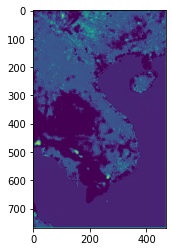

In [43]:
# Thử test ngày 16/2/2019 và trực quan hóa kết quả
output1 = test_date(datetime.datetime(2019, 2, 16))
plt.imshow(output1)

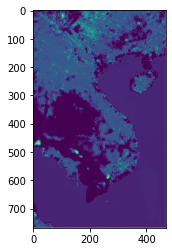

In [44]:
# Thử test ngày 18/4/2019 và trực quan hóa kết quả
output2 = test_date(datetime.datetime(2019, 4, 18))
plt.imshow(output2)

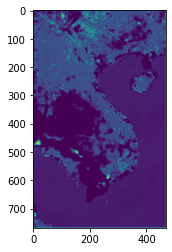

In [45]:
# Thử test ngày 15/11/2019 và trực quan hóa kết quả
output3 = test_date(datetime.datetime(2019, 11, 15))
plt.imshow(output3)